## Self coding the univariate gradient decent 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib nbagg

<IPython.core.display.Javascript object>


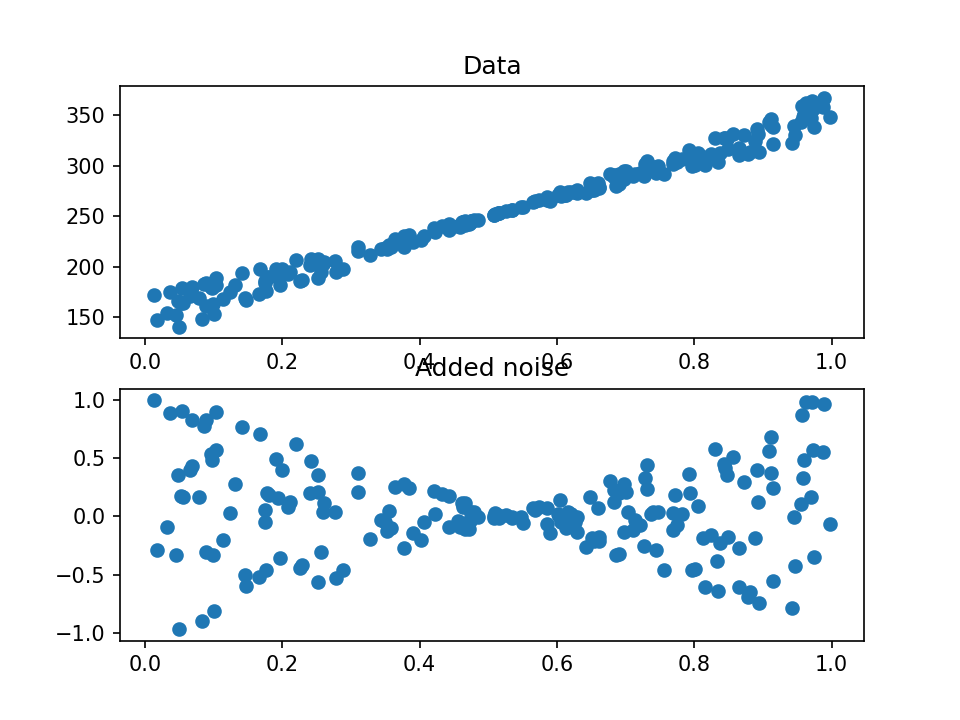

In [12]:
#generate data set
# y = 200x + 150

w_true = 200
b_true = 150

m = 200  #number of data points
x = np.random.rand(m)
y = w_true * x + b_true 


#adding some noise centered arround corners
NOISE_STRENGTH = 20
g = (2*(np.random.rand(m)-0.5)) * (y-y.mean())*2 
assert abs(g).max()!=0
g = g/abs(g).max()
y += g * NOISE_STRENGTH

#show data
fig,ax1 = plt.subplots(2)
ax1[0].scatter(x,y)
ax1[0].set_title('Data')
ax1[1].scatter(x,g)
ax1[1].set_title('Added noise')

plt.show()



final
w: 198.670442398611 & b: 151.58505313898914


<IPython.core.display.Javascript object>


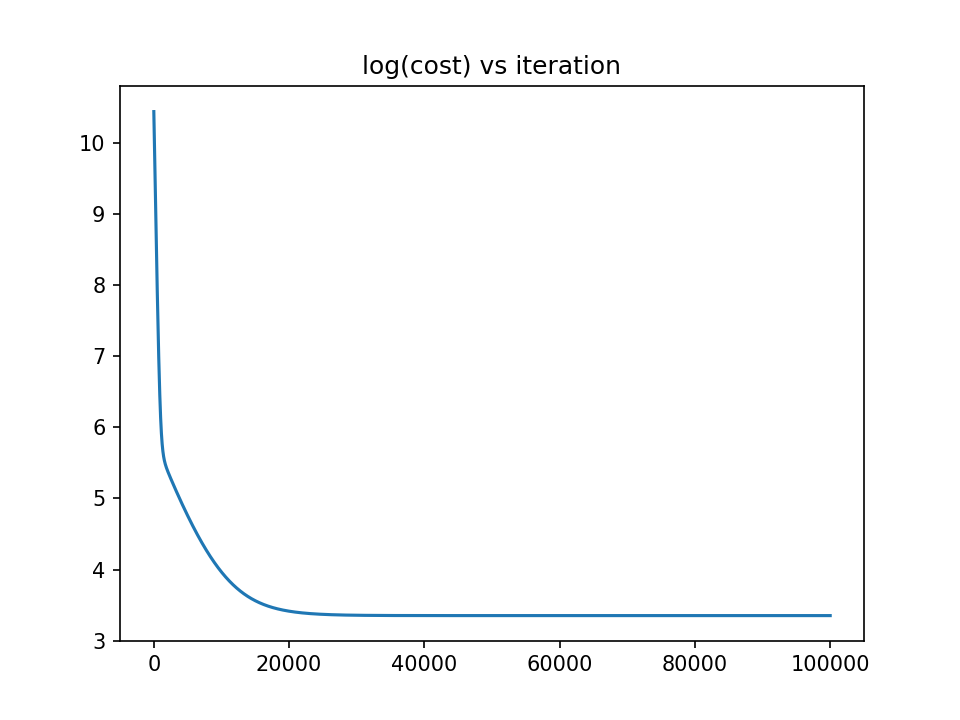

In [13]:
#finding the best fit

w=0
b=0
lr = 2.0e-3
iterations = 100000

history = []
cost_history = []

for i in range(iterations):
    
    #show cost
    j = np.sum((w*x+b-y)**2)/(2*m)
    cost_history.append(j)
    #print(f"iteration : {i} & cost: {j}")
    
    dw = np.sum((w*x+b-y)*x)/m
    db = np.sum(w*x+b-y)/m
    
    w -= lr * dw
    b -= lr * db
    
    history.append((w,b))
    #print(f"w: {w} & b: {b}")
    #print("----")

print("final")
print(f"w: {w} & b: {b}")



cost_history = np.log(cost_history)
fig,ax = plt.subplots(1)
ax.plot(cost_history)
ax.set_title('log(cost) vs iteration')
plt.show()
    

In [14]:
import ipywidgets as widgets
import IPython.display as ipd

## Making a slider to see how the prediction function changed overtime (Timeline)

<IPython.core.display.Javascript object>


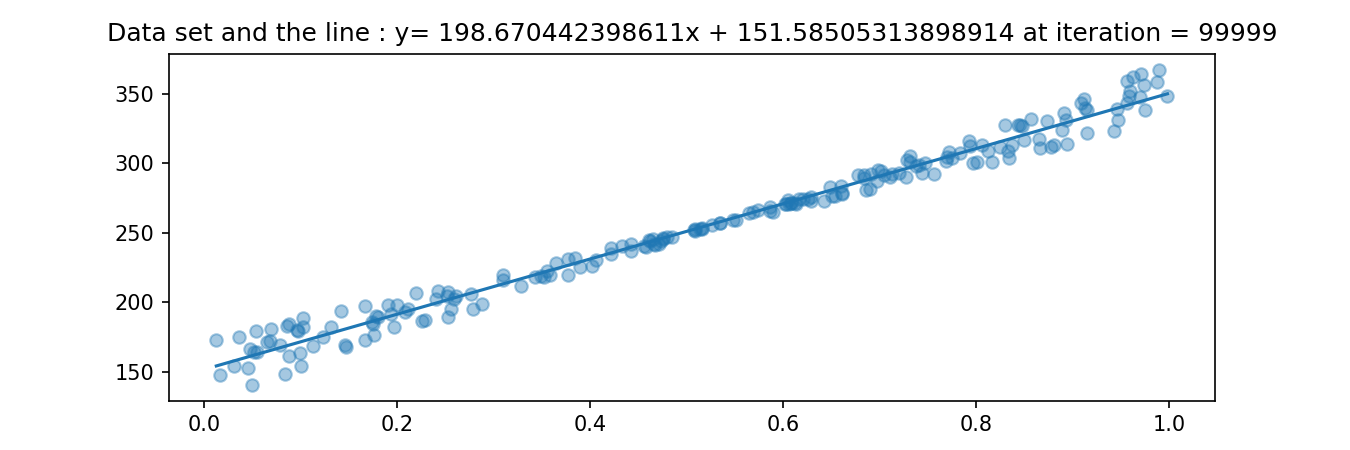

interactive(children=(FloatSlider(value=1.0, description='Select the time:', min=1.0), Output()), _dom_classes…

In [15]:
def update_plot(interested_time_index):
    gamma = 5
    time_index = int((interested_time_index/100)**gamma * (len(history)-1)) if interested_time_index!=100 else len(history)-1
    
    w_,b_ = history[time_index]
    #get minimum and maximum x in data set
    x_ = np.array(x)

    
    
    #show data
    ax.clear()
    ax.scatter(x,y,alpha=0.4)
    
    ax.plot(np.array([x_.min(),x_.max()]),np.array([x_.min(),x_.max()])*w_ + b_)
    
    
    plt.title(f"Data set and the line : y= {w_}x + {b_} at iteration = {time_index}")
    plt.show()

fig,ax = plt.subplots(1,figsize=(9,3))
interested_time_index = widgets.FloatSlider(description="Select the time:",max=100,min=1)
widgets.interactive(update_plot,interested_time_index=interested_time_index)

## Multiple linear regression - coding

In [43]:
#multi dot function is usefulll!!!
g = np.array([1,2,3])
h = np.array([[1,2,3],
             [4,5,6]])

np.linalg.multi_dot((h,g))

array([14, 32])

In [30]:
# y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

#generate data set
w1_true = -1
w2_true = -2
w3_true = 3
w4_true = 4
w5_true = 5
b_true  = 6

m = 100#length of the data set
x = np.random.rand(m,5)
w_true = np.array([w1_true,w2_true,w3_true,w4_true,w5_true])
y=np.linalg.multi_dot((x,w_true)) + b_true




#we cannot plot this (bcz there are five feature axises needed)







In [31]:
#multiple :: gradient decent

cost_history = []
param_history = []


w = np.random.rand(5)
b = 0
lr =1.0e-3 #1.0e-2

iterations = 100_000
for i in range(iterations):
    
    diffs_in_pred =  (np.linalg.multi_dot((x,w)) + b - y)
    cost = np.sum(diffs_in_pred ** 2)
    cost_history.append(cost)
    param_history.append((*w,b))                        
    
    
    for j in range(5):
        w[j] -= lr * (1/m) * np.dot(diffs_in_pred,x[:,j])
    b -= lr * (1/m) * diffs_in_pred.sum()
    
print("final")
print(f"w = {w}")
print(f"b = {b}")
    

final
w = [-0.96916793 -1.96738735  3.01125496  4.0088202   5.01937764]
b = 5.947806440648369


<IPython.core.display.Javascript object>


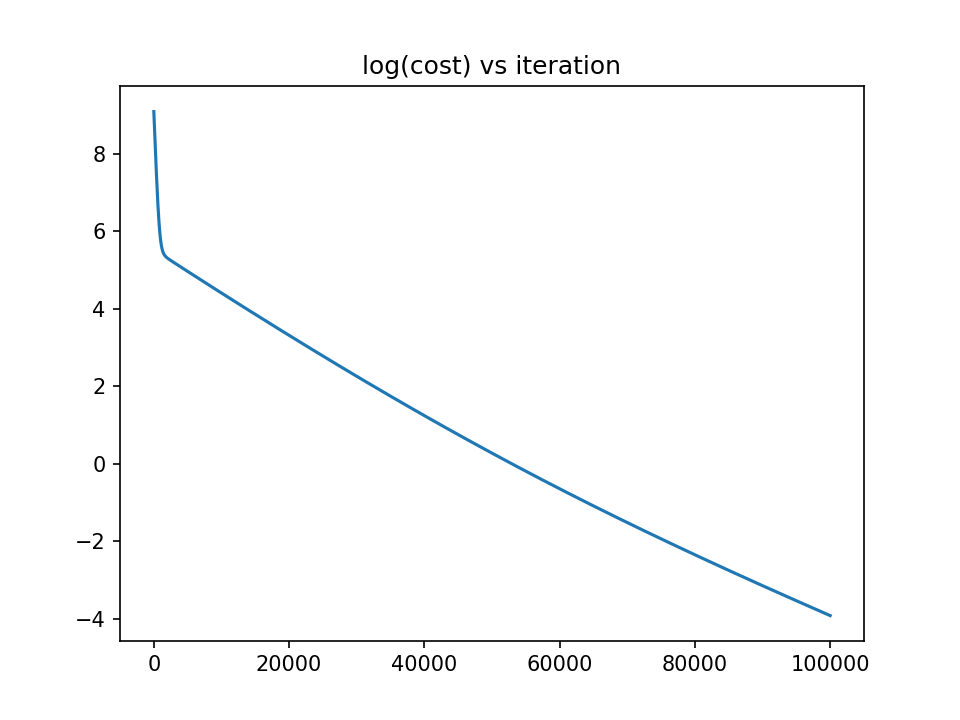

In [32]:
#analys how the cost decreased
fig,ax = plt.subplots(1)
ax.plot(np.log(cost_history))
ax.set_title('log(cost) vs iteration')
plt.show()

<IPython.core.display.Javascript object>


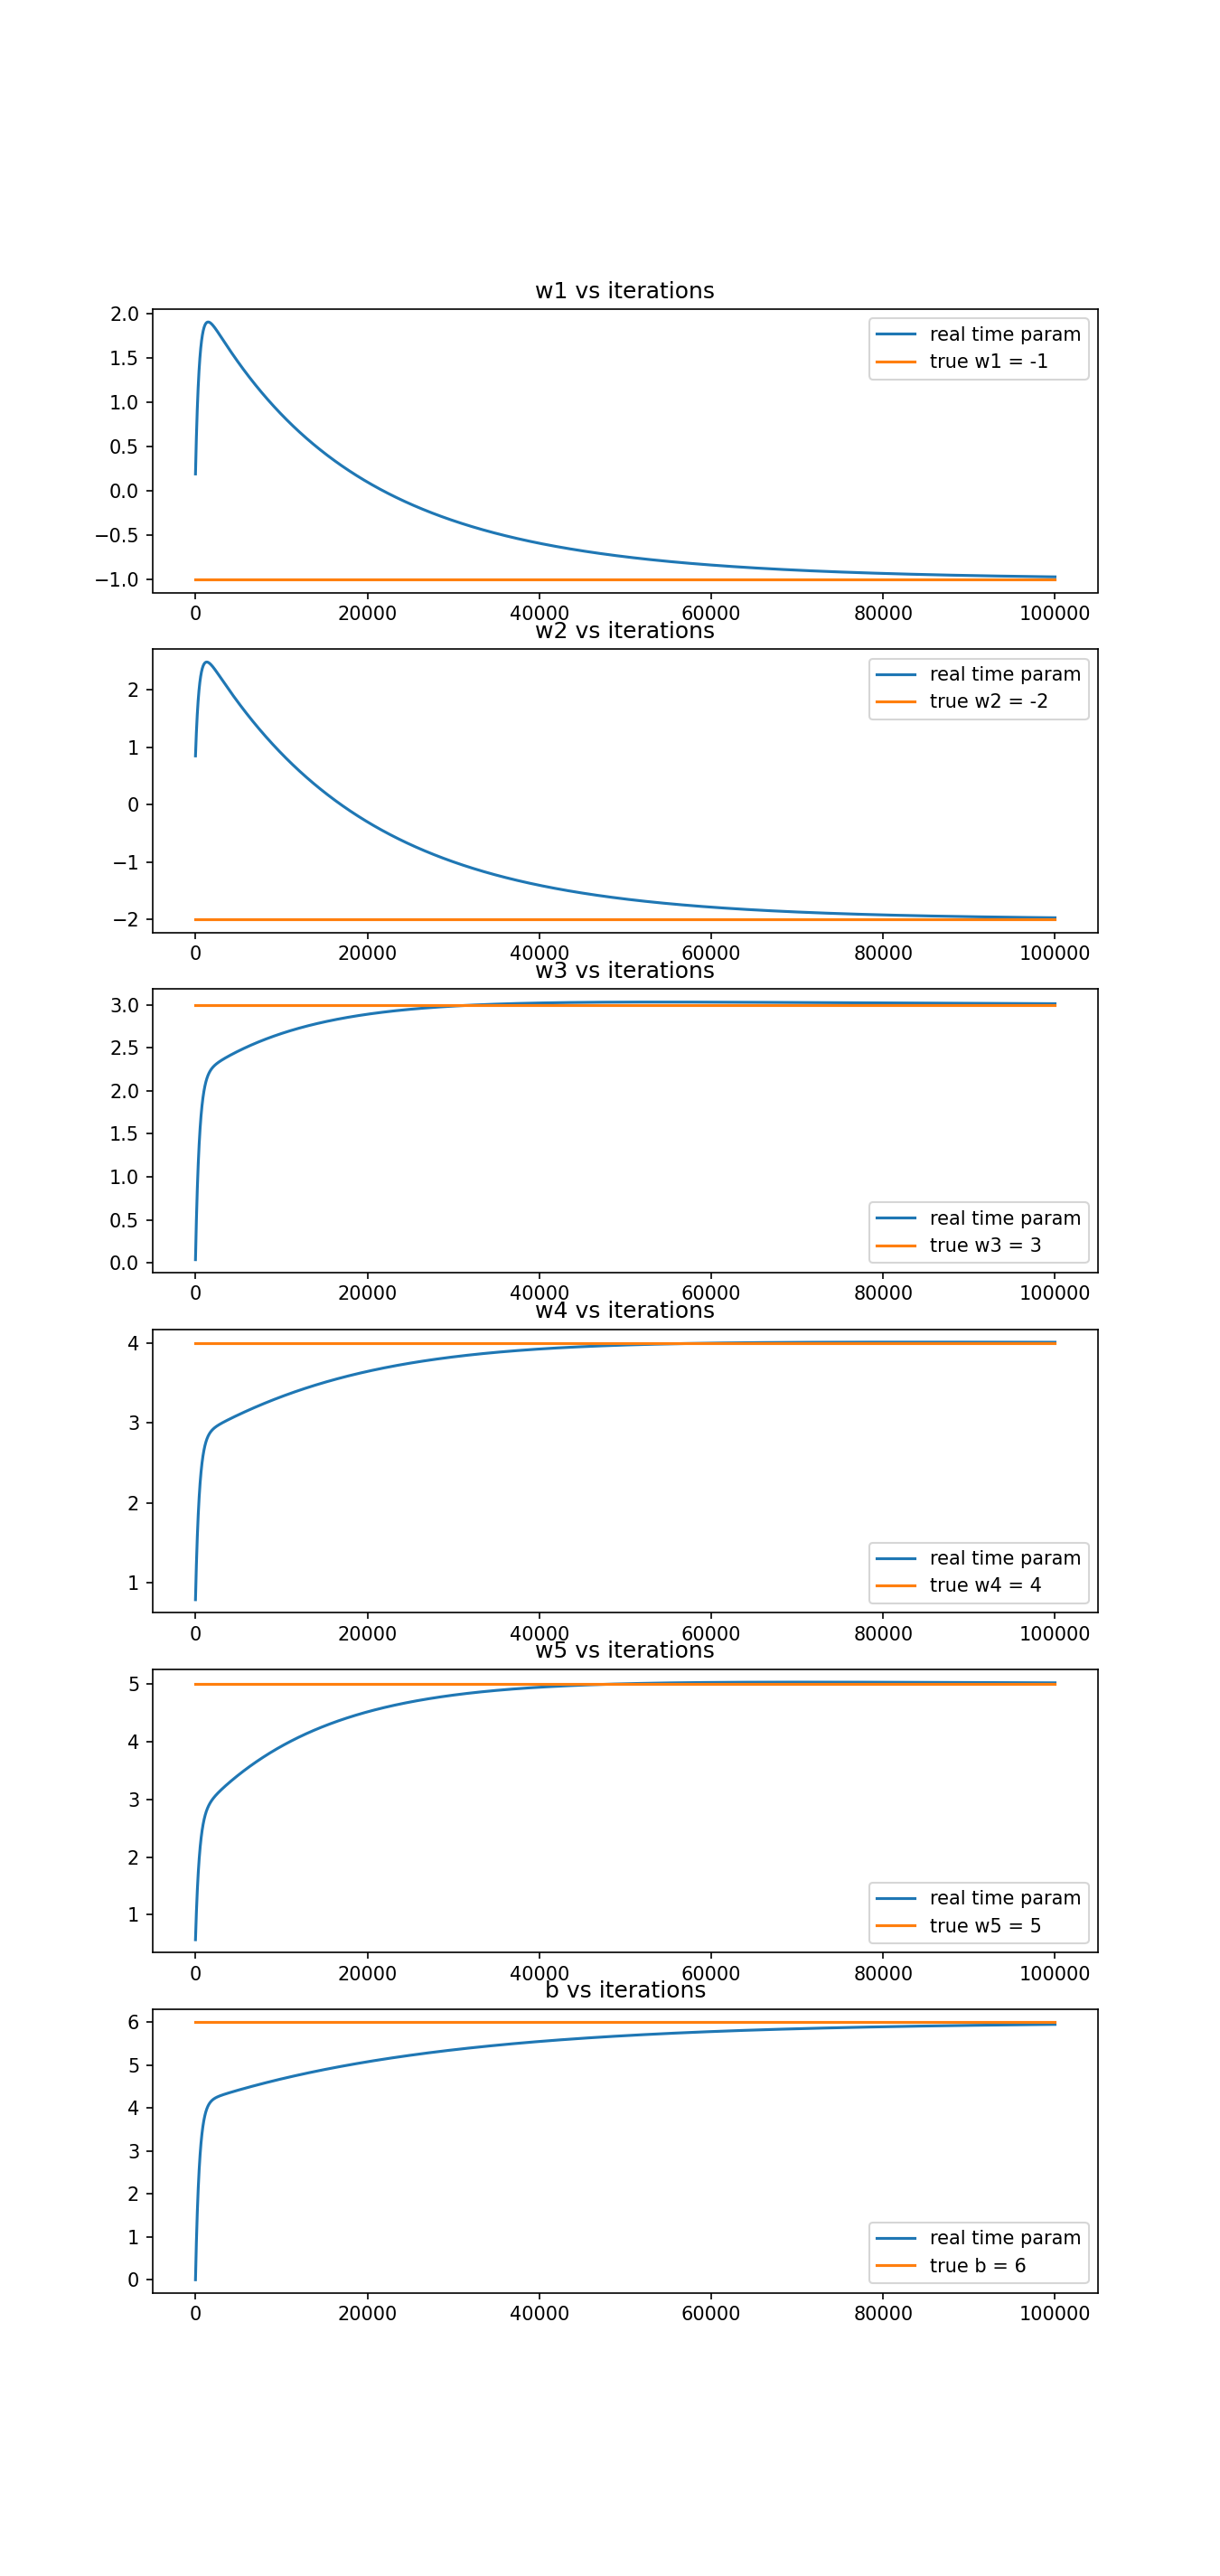

In [33]:
#how parameters converged
param_history = np.array(param_history)
fig,ax = plt.subplots(6,figsize=(9,19))
names = ['w1','w2','w3','w4','w5','b']
true_params = [w1_true,w2_true,w3_true,w4_true,w5_true,b_true]
for i in range(6):
    ax[i].plot(param_history[:,i],label='real time param')
    ax[i].set_title('{} vs iterations'.format(names[i]))
    ax[i].plot([0,iterations-1],[true_params[i]]*2,linestyle='-',label='true {} = {}'.format(names[i],true_params[i]))
    ax[i].legend()
plt.show()
    